# 机器学习之分类算法
分类：
- 逻辑回归
- 神经网络
- 决策树
- 支持向量机


首先，导入实验用的数据

In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/classifier_1.csv')
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

In [28]:
data.describe()

,x1,x2,y
count,96.000000,96.000000,96.000000
mean,0.471150,0.548824,0.666667
std,0.270615,0.259396,0.473879
min,0.077189,0.086257,0.000000
25%,0.243663,0.312868,0.000000
50%,0.441240,0.580410,1.000000
75%,0.717167,0.767545,1.000000
max,0.934330,0.945910,1.000000


测试集和数据集拆分

In [19]:
from sklearn.model_selection import train_test_split
'''
训练集和测试机数据拆分

输入:
    test_size:测试数据占比

返回
    X_train：训练输入数据
    X_test： 测试输入数据
    y_train：训练标签
    y_test： 测试标签
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.25,
    random_state=42
)

## 逻辑回归

定义分类器并将分类器和数据拟合

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 决策树

In [6]:
from sklearn.tree import DecisionTreeClassifier

classifier= DecisionTreeClassifier()
classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()

### 支持向量机
```
SVC(kernel = 'rbf', gamma = 200, degree = None, C = None)
```
- kernel：linear (线性)， poly（多项式）, rbf（高斯核）
- degree：多项式内核的次数（如果选择了多项式内核）
- gamma ：γ 参数
- C：C参数

In [7]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

在测试集上进行数据拟合

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

做预测

In [15]:
y_pred = classifier.predict(X_test)

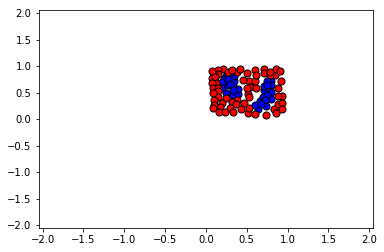

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')
    
plt.xlim(-2.05,2.05)
plt.ylim(-2.05,2.05)
plt.grid(False)
plt.tick_params(
    axis='x',
    which='both',
    bottom=True,
    top=False)

plt.show()

评估指标**准确率**计算

In [12]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

0.9166666666666666

### 模型选择

#### 学习曲线

In [16]:
data.shape

(96, 3)